## Spotify Exploratory Data Analysis


In [175]:
# Import all required libraries

import os 
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf
import numpy as np
import nltk
import re
from wordcloud import WordCloud

In [176]:
# Check the current directory path
os.getcwd()

'/Users/vaibhav_chaudhari/Desktop/Final Project Scripting'

In [177]:
# Change directory path to required folder

os.chdir("/Users/vaibhav_chaudhari/Desktop/Final Project Scripting")
os.getcwd()

'/Users/vaibhav_chaudhari/Desktop/Final Project Scripting'

In [178]:
# Import the JSON file and read into pandas data frame
# read_json() used to read in json file as pandas data frame

with open("Spotify_songs.json", "r") as Spotify_songs:
    spotify_songs_data = pd.read_json(Spotify_songs, orient = 'list')
    
# Glimpse data frame spotify_songs_data    
spotify_songs_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [179]:
# read in artist statistical data from spotify as a csv file
# convert the csv file to data frame in pandas using read_csv()

artist_stat = pd.read_csv("spotify_artist_data.csv")
artist_stat.head(10)

,Unnamed: 0,Artist Name,Lead Streams,Feats,Tracks,One Billion,100 Million,Last Updated
0,1,Drake,"50,162,292,808","19,246,513,666",262,6,130,19.09.22
1,2,Bad Bunny,"44,369,032,140","5,391,990,975",163,5,118,20.09.22
2,3,Ed Sheeran,"38,153,682,361","2,791,278,201",240,10,62,19.09.22
3,4,The Weeknd,"34,767,779,741","4,288,903,657",186,8,72,19.09.22
4,5,Taylor Swift,"32,596,728,109","424,053,296",323,1,96,20.09.22
5,6,Justin Bieber,"32,465,998,885","10,816,202,075",225,6,58,20.09.22
6,7,Ariana Grande,"32,287,682,040","2,052,297,828",181,8,71,19.09.22
7,8,Eminem,"30,431,861,291","4,165,031,640",301,5,65,19.09.22
8,9,Post Malone,"29,832,277,109","2,728,018,288",98,9,57,19.09.22
9,10,BTS,"28,533,458,128","323,205,288",262,1,98,19.09.22


In [180]:
# Drop rows with NAs or abnormal data

artist_stat.drop(artist_stat[artist_stat['Last Updated'] == "Update"].index, inplace = True)
artist_stat.head()

,Unnamed: 0,Artist Name,Lead Streams,Feats,Tracks,One Billion,100 Million,Last Updated
0,1,Drake,"50,162,292,808","19,246,513,666",262,6,130,19.09.22
1,2,Bad Bunny,"44,369,032,140","5,391,990,975",163,5,118,20.09.22
2,3,Ed Sheeran,"38,153,682,361","2,791,278,201",240,10,62,19.09.22
3,4,The Weeknd,"34,767,779,741","4,288,903,657",186,8,72,19.09.22
4,5,Taylor Swift,"32,596,728,109","424,053,296",323,1,96,20.09.22


In [181]:
# check data types of the dataframe attributes
artist_stat.dtypes

Unnamed: 0       int64
Artist Name     object
Lead Streams    object
Feats           object
Tracks          object
One Billion     object
100 Million     object
Last Updated    object
dtype: object

In [182]:
# Data Cleaning 

# change comma seperated numbers to numbers

for col in artist_stat.columns:
    if ',' in artist_stat[col].to_string():
        artist_stat[col + '_processed'] = artist_stat[col].str.replace(',', '')
            #Try to convert this new column to a numeric type
        try:
            artist_stat[col + '_processed'] = artist_stat[col + '_processed'].apply(pd.to_numeric, errors='coerce').dropna()
        except Exception:
            print(f'{col} can not be converted to a float!')

            
artist_stat["One Billion"] = artist_stat["One Billion"].astype('int64')
artist_stat["100 Million"] = artist_stat["100 Million"].astype('int64')
artist_stat.head()


,Unnamed: 0,Artist Name,Lead Streams,Feats,Tracks,One Billion,100 Million,Last Updated,Artist Name_processed,Lead Streams_processed,Feats_processed,Tracks_processed
0,1,Drake,"50,162,292,808","19,246,513,666",262,6,130,19.09.22,NaN,50162292808,19246513666,262
1,2,Bad Bunny,"44,369,032,140","5,391,990,975",163,5,118,20.09.22,NaN,44369032140,5391990975,163
2,3,Ed Sheeran,"38,153,682,361","2,791,278,201",240,10,62,19.09.22,NaN,38153682361,2791278201,240
3,4,The Weeknd,"34,767,779,741","4,288,903,657",186,8,72,19.09.22,NaN,34767779741,4288903657,186
4,5,Taylor Swift,"32,596,728,109","424,053,296",323,1,96,20.09.22,NaN,32596728109,424053296,323


In [183]:
# check data types of dataframe
artist_stat.dtypes

Unnamed: 0                  int64
Artist Name                object
Lead Streams               object
Feats                      object
Tracks                     object
One Billion                 int64
100 Million                 int64
Last Updated               object
Artist Name_processed     float64
Lead Streams_processed      int64
Feats_processed             int64
Tracks_processed            int64
dtype: object

In [184]:
# remove columns which are not necessary for our analysis

del(artist_stat["Lead Streams"])
del(artist_stat["Feats"])
del(artist_stat["Tracks"])
del(artist_stat["Unnamed: 0"])
del(artist_stat["Artist Name_processed"])
del(artist_stat["Last Updated"])

artist_stat.head()

,Artist Name,One Billion,100 Million,Lead Streams_processed,Feats_processed,Tracks_processed
0,Drake,6,130,50162292808,19246513666,262
1,Bad Bunny,5,118,44369032140,5391990975,163
2,Ed Sheeran,10,62,38153682361,2791278201,240
3,The Weeknd,8,72,34767779741,4288903657,186
4,Taylor Swift,1,96,32596728109,424053296,323


In [185]:
# There is another file with data related to artists from spotify
# convert the csv file to data frame in pandas using read_csv()

artist_spotify = pd.read_csv("nodes.csv")
artist_spotify.head()

,spotify_id,name,followers,popularity,genres,chart_hits
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24,"['nordic house', 'russelater']",['no (3)']
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']


In [186]:
# check data types
artist_spotify.dtypes


spotify_id     object
name           object
followers     float64
popularity      int64
genres         object
chart_hits     object
dtype: object

In [187]:
# delete unnecessary columns
del(artist_spotify["spotify_id"])
artist_spotify.head()

,name,followers,popularity,genres,chart_hits
0,Byklubben,1738.0,24,"['nordic house', 'russelater']",['no (3)']
1,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
2,Maxim,34596.0,36,[],['de (1)']
3,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
4,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']


In [188]:
# Let's combine data frames artist_stat and artist_spotify horizontally
# the column for joining the data frame is Artist name in artist_stat

# First lets change name of artist column in artist_spotify to 'Artist name'
artist_spotify.rename(columns={'name': 'Artist Name'}, inplace=True)


# Perform a left join on artist_stat with key as 'Artist name'

artist_stat = artist_stat.merge(artist_spotify, on='Artist Name', how='left')
artist_stat.head(3)

,Artist Name,One Billion,100 Million,Lead Streams_processed,Feats_processed,Tracks_processed,followers,popularity,genres,chart_hits
0,Drake,6,130,50162292808,19246513666,262,66852536.0,95.0,"['canadian hip hop', 'canadian pop', 'hip hop'...","['us (190)', 'gb (163)', 'ar (18)', 'au (148)'..."
1,Bad Bunny,5,118,44369032140,5391990975,163,55669387.0,100.0,"['reggaeton', 'trap latino']","['us (76)', 'gb (1)', 'ar (91)', 'au (2)', 'at..."
2,Ed Sheeran,10,62,38153682361,2791278201,240,102156853.0,90.0,"['pop', 'uk pop']","['us (52)', 'gb (83)', 'ar (36)', 'au (65)', '..."


In [189]:
# Data Manipulation
# add total streams column
artist_stat["Total Streams"] = artist_stat["Lead Streams_processed"] + artist_stat["Feats_processed"]
artist_stat.head(3)

,Artist Name,One Billion,100 Million,Lead Streams_processed,Feats_processed,Tracks_processed,followers,popularity,genres,chart_hits,Total Streams
0,Drake,6,130,50162292808,19246513666,262,66852536.0,95.0,"['canadian hip hop', 'canadian pop', 'hip hop'...","['us (190)', 'gb (163)', 'ar (18)', 'au (148)'...",69408806474
1,Bad Bunny,5,118,44369032140,5391990975,163,55669387.0,100.0,"['reggaeton', 'trap latino']","['us (76)', 'gb (1)', 'ar (91)', 'au (2)', 'at...",49761023115
2,Ed Sheeran,10,62,38153682361,2791278201,240,102156853.0,90.0,"['pop', 'uk pop']","['us (52)', 'gb (83)', 'ar (36)', 'au (65)', '...",40944960562


In [190]:
# add column to represent views per track for artists 
# divide column tracks by total streams to get ratio as required in dataframe

artist_stat['Views/Track'] = round(artist_stat['Total Streams'] / artist_stat['Tracks_processed'])
artist_stat.head(3)

,Artist Name,One Billion,100 Million,Lead Streams_processed,Feats_processed,Tracks_processed,followers,popularity,genres,chart_hits,Total Streams,Views/Track
0,Drake,6,130,50162292808,19246513666,262,66852536.0,95.0,"['canadian hip hop', 'canadian pop', 'hip hop'...","['us (190)', 'gb (163)', 'ar (18)', 'au (148)'...",69408806474,264919109.0
1,Bad Bunny,5,118,44369032140,5391990975,163,55669387.0,100.0,"['reggaeton', 'trap latino']","['us (76)', 'gb (1)', 'ar (91)', 'au (2)', 'at...",49761023115,305282350.0
2,Ed Sheeran,10,62,38153682361,2791278201,240,102156853.0,90.0,"['pop', 'uk pop']","['us (52)', 'gb (83)', 'ar (36)', 'au (65)', '...",40944960562,170604002.0


In [191]:
# split genre of spotify songs and only keep main genre of song in the genre column
# split based on "," and use index to store only first value of split

spotify_songs_data['genre'] = spotify_songs_data['genre'].str.split(',').str[0]
spotify_songs_data['genre'].head(10)

0                 pop
1                rock
2                 pop
3                rock
4                 pop
5             hip hop
6             hip hop
7                 pop
8                 pop
9    Dance/Electronic
Name: genre, dtype: object

## Exploratory Data Analysis

In [192]:
# see descriptive statistis of the data frmae for all numerical columns 
spotify_songs_data.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [193]:
spotify_songs_data.mode().dropna()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Rihanna,Sorry,212106.0,False,2012.0,0.0,0.688,0.783,1.0,-6.366,1.0,0.0432,0.107,0.0,0.104,0.418,140.022,pop


                genre  count
9                 pop    936
6             hip hop    776
10               rock    162
0    Dance/Electronic     41
11              set()     22
7               latin     15
2                 R&B     13
4             country     11
3   World/Traditional     10
8               metal      9
1       Folk/Acoustic      4
5      easy listening      1


Text(0.5, 1.0, 'Popularity Based on genre')

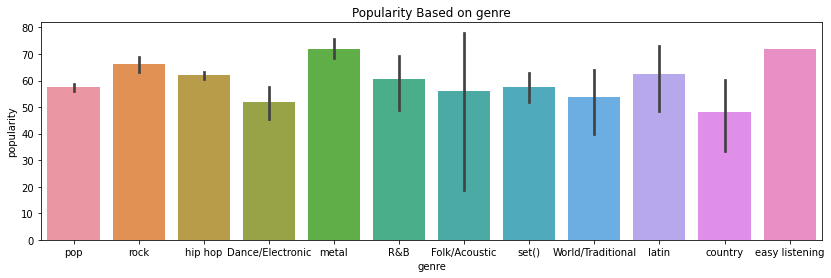

In [200]:
genre_top = spotify_songs_data.groupby(["genre"])['genre'].count().reset_index(name='count').sort_values('count',ascending=False)
print(genre_top)
# bar plot x axis as genre and y axis as popularity
# set figure size
fig, ax = plt.subplots(figsize=(14, 4))
sns.barplot(x = 'genre', y = 'popularity', data = spotify_songs_data, ax = ax)
plt.title('Popularity Based on genre')

           artist  count
8         Rihanna     25
4           Drake     23
6          Eminem     21
1   Calvin Harris     20
0  Britney Spears     19
3    David Guetta     18
2     Chris Brown     17
9    Taylor Swift     16
7   Justin Bieber     10
5      Ed Sheeran      9


Text(0.5, 1.0, 'Popularity Based on artist')

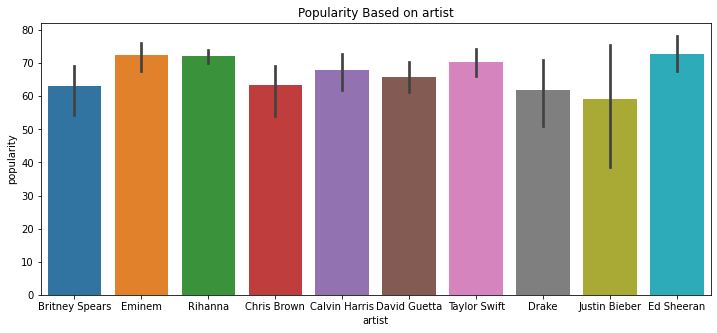

In [194]:
# popularity by top artists plot 
# subset spotify song data only for certain artists
# using seaborn create bar plot for the same


# use .loc and .isin to subset the data frame of spotify songs

plot_data = spotify_songs_data.loc[spotify_songs_data['artist'].isin(['Drake','Britney Spears'
                                                           ,'Rihanna','Eminem','Justin Bieber','Ed Sheeran','Calvin Harris'
                                                          ,'Taylor Swift','David Guetta','Chris Brown'])]
song_count_topchart = plot_data.groupby(["artist"])['artist'].count().reset_index(name='count').sort_values('count',ascending=False)
print(song_count_topchart)
# bar plot x axis as artist and y axis as popularity
# set figure size
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x = 'artist', y = 'popularity', data = plot_data, ax = ax)
plt.title('Popularity Based on artist')


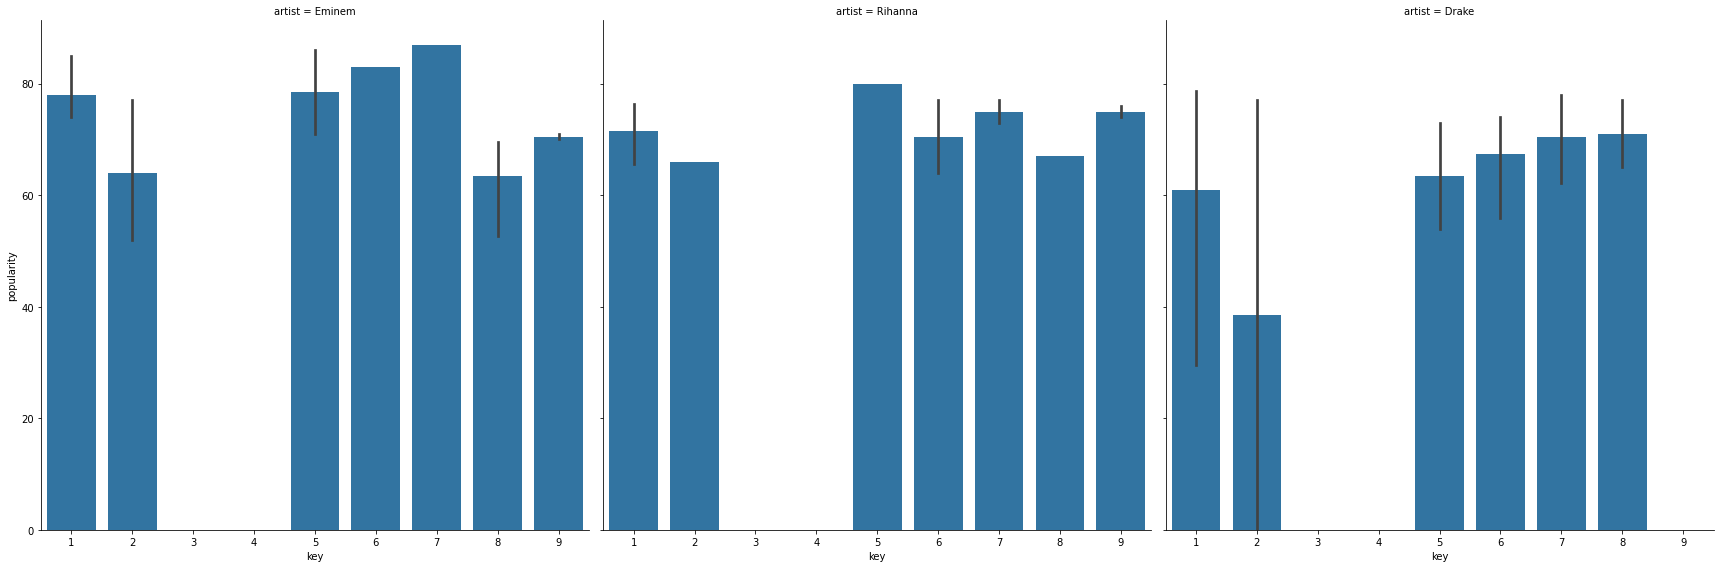

In [150]:
# for top artist lets check how the key factor of song relates to popularity of song

# lets filter songs data for only Drake, Rihanna and Eminem
keys_artist = plot_data.loc[plot_data["artist"].isin(["Rihanna","Drake","Eminem"])]

# facet grid function used to create multiple bar plots
# parameters defined as per requirement of plot
sea = sns.FacetGrid(keys_artist, col = "artist",
                    height = 8, aspect = 1)
sea.map(sns.barplot, "key", "popularity", order =[1,2,3,4,5,6,7,8,9])

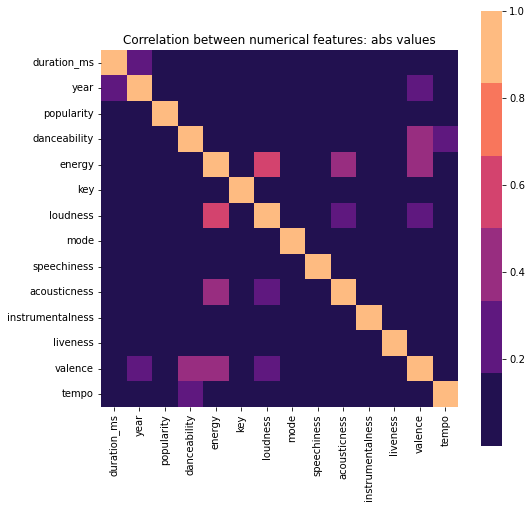

In [151]:
# look at correlation of songs featurs in the spotify songs data frame
# heatmap function used to plot correlation

corr_data = spotify_songs_data[["duration_ms","year","popularity","danceability","energy","key",
                                "loudness","mode","speechiness","acousticness","instrumentalness","liveness",
                                "valence","tempo"]]

corr=np.abs(corr_data.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("magma")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features: abs values')
plt.show()

In [152]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
print('The most linear correlated features to POPULARITY are:')
for i, row in enumerate(series):
    print(f'{series.index[i]:17} --> {row: .2f} (abs)')

The most linear correlated features to POPULARITY are:
popularity        -->  1.00 (abs)
duration_ms       -->  0.05 (abs)
instrumentalness  -->  0.05 (abs)
loudness          -->  0.03 (abs)
acousticness      -->  0.02 (abs)
mode              -->  0.02 (abs)
speechiness       -->  0.02 (abs)
valence           -->  0.02 (abs)
key               -->  0.01 (abs)
tempo             -->  0.01 (abs)
energy            -->  0.01 (abs)
liveness          -->  0.01 (abs)
year              -->  0.00 (abs)
danceability      -->  0.00 (abs)


### Q1) Performance of top artists by year on spotify top charts

Total top songs for artist: 23


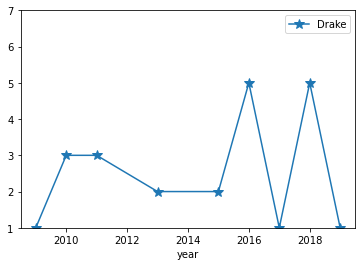

In [153]:
# artist top tracks per year line chart

# Drake
drake_top_songs = spotify_songs_data.loc[spotify_songs_data['artist'] == 'Drake']
drake_top_songs = drake_top_songs.groupby(["year"])["year"].count().reset_index(name='Drake')
drake_top_songs.plot(x='year',y='Drake',ylim=[1,7],marker='*',markersize=10)
print("Total top songs for artist:",drake_top_songs['Drake'].sum())

Total top songs for artist: 9


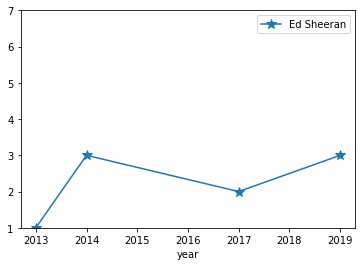

In [154]:
# Ed Sheeran
edsheeran_top_songs = spotify_songs_data.loc[spotify_songs_data['artist'] == 'Ed Sheeran']
edsheeran_top_songs = edsheeran_top_songs.groupby(["year"])["year"].count().reset_index(name='Ed Sheeran')
edsheeran_top_songs.plot(x='year',y='Ed Sheeran',ylim=[1,7],marker='*',markersize=10)
print("Total top songs for artist:",edsheeran_top_songs['Ed Sheeran'].sum())

Total top songs for artist: 10


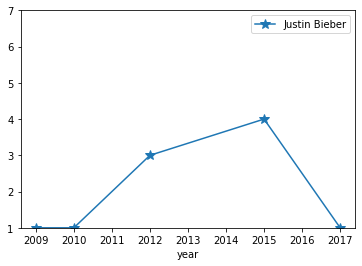

In [155]:
# Justin Bieber
justin_top_songs = spotify_songs_data.loc[spotify_songs_data['artist'] == 'Justin Bieber']
justin_top_songs = justin_top_songs.groupby(["year"])["year"].count().reset_index(name='Justin Bieber')
justin_top_songs.plot(x='year',y='Justin Bieber',ylim=[1,7],marker='*',markersize=10)
print("Total top songs for artist:",justin_top_songs['Justin Bieber'].sum())

Total top songs for artist: 19


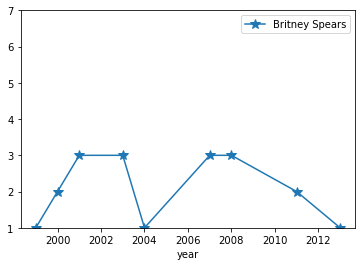

In [156]:
# Britney Spears
Britney_Spears_top_songs = spotify_songs_data.loc[spotify_songs_data['artist'] == 'Britney Spears']
Britney_Spears_top_songs = Britney_Spears_top_songs.groupby(["year"])["year"].count().reset_index(name='Britney Spears')
Britney_Spears_top_songs.plot(x='year',y='Britney Spears',ylim=[1,7],marker='*',markersize=10)
print("Total top songs for artist:",Britney_Spears_top_songs['Britney Spears'].sum())

Total top songs for artist: 25


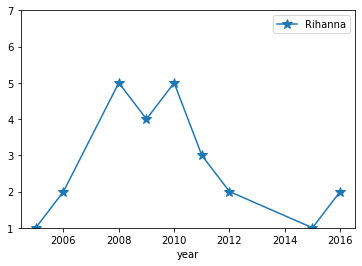

In [157]:
# Rihanna
Rihanna_top_songs = spotify_songs_data.loc[spotify_songs_data['artist'] == 'Rihanna']
Rihanna_top_songs = Rihanna_top_songs.groupby(["year"])["year"].count().reset_index(name='Rihanna')
Rihanna_top_songs.plot(x='year',y='Rihanna',ylim=[1,7],marker='*',markersize=10)
print("Total top songs for artist:",Rihanna_top_songs['Rihanna'].sum())

Total top songs for artist: 21


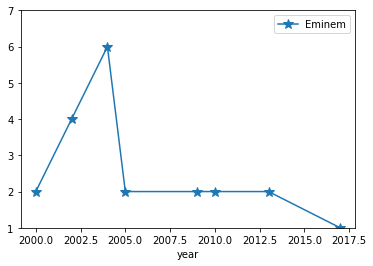

In [158]:
# Eminem
Eminem_top_songs = spotify_songs_data.loc[spotify_songs_data['artist'] == 'Eminem']
Eminem_top_songs = Eminem_top_songs.groupby(["year"])["year"].count().reset_index(name='Eminem')
Eminem_top_songs.plot(x='year',y='Eminem',ylim=[1,7],marker='*',markersize=10)
print("Total top songs for artist:",Eminem_top_songs['Eminem'].sum())

### Q2) Ranking artists by:
#####     - Total Stream (billion) on spotify
#####    - Followers (million) on spotify
#####     - Popularity on spotify
#####    - Views/Track (million) on spotify

In [164]:
### Top 10 artist on spotify by the number of total song streams for the artist  

# sort the data frame by total streams in descing order
Top_artist_streams = artist_stat.sort_values(by=["Total Streams"], ascending=False).head(10)

# transform streams column to billion unit 
Top_artist_streams["Total Streams"] = round(Top_artist_streams["Total Streams"] / 1000000000).astype('int')

# select only necessary columns and set index to artist
Top_artist_streams = Top_artist_streams[["Artist Name","Total Streams"]]
Top_artist_streams.set_index("Artist Name",inplace=True)
Top_artist_streams = Top_artist_streams.rename(columns={'Total Streams': 'Total Streams (bil)'})

# save files to csv
Top_artist_streams.to_csv("Top_artist_streams.csv")

# view the dataframe
Top_artist_streams

,Total Streams (bil)
Artist Name,
Drake,69
Bad Bunny,50
Justin Bieber,43
Ed Sheeran,41
The Weeknd,39
J Balvin,36
Eminem,35
Ariana Grande,34
Taylor Swift,33


In [163]:
### Top 10 artist on spotify by the number of followers they have 

# followers in millions
Top_artist_followers = artist_stat[['Artist Name','followers']].sort_values('followers',ascending=False).head(10)
Top_artist_followers.set_index("Artist Name",inplace = True)
Top_artist_followers['followers'] = round(Top_artist_followers['followers']/1000000).astype('int')
Top_artist_followers = Top_artist_followers.rename(columns={'followers': 'followers (mil)'})
Top_artist_followers.to_csv("Top_artist_followers.csv")

# view the dataframe
Top_artist_followers

,followers (mil)
Artist Name,
Ed Sheeran,102
Ariana Grande,83
Billie Eilish,68
Drake,67
Justin Bieber,66
Eminem,59
Taylor Swift,59
Arijit Singh,59
Bad Bunny,56


In [161]:
### Top 10 artist on spotify by their popularity on spotify

# popularity out of 100
Top_artist_popularity = artist_stat[['Artist Name','popularity']].sort_values('popularity',ascending=False).head(10)
Top_artist_popularity.set_index("Artist Name",inplace = True)

Top_artist_popularity.to_csv("Top_artist_popularity.csv")

# view the dataframe
Top_artist_popularity

,popularity
Artist Name,
Bad Bunny,100.0
Drake,95.0
Taylor Swift,94.0
The Weeknd,93.0
Kanye West,91.0
BTS,91.0
Harry Styles,91.0
Eminem,90.0
Justin Bieber,90.0


In [162]:
# which are the top 5 artists with highest views per track on spotify
# for this first we need artist with atleast 150 songs on spotify that are processed
temp_artist_stat = artist_stat.loc[artist_stat['Tracks_processed'] >=150]

Top_artist_view_per_track = temp_artist_stat[['Artist Name','Views/Track']].sort_values('Views/Track',ascending=False).head(10)
Top_artist_view_per_track['Views/Track'] = round(Top_artist_view_per_track['Views/Track'] / 1000000).astype('int')
Top_artist_view_per_track = Top_artist_view_per_track.rename(columns={'Views/Track': 'Views/Track (mil)'})
Top_artist_view_per_track.to_csv('Top_artist_view_per_track.csv')

Top_artist_view_per_track

,Artist Name,Views/Track (mil)
1,Bad Bunny,305
0,Drake,265
3,The Weeknd,210
5,Justin Bieber,192
6,Ariana Grande,190
2,Ed Sheeran,171
10,J Balvin,148
43,Nicki Minaj,148
18,Ozuna,133
11,Kanye West,131


### For each year which artist had highest number of songs listed on Spotify Top Charts

In [201]:
# year wise which artist had the most top songs on spotify charts
# the requirement for the data frame required is fulfiled by using sqldf library
# querying the pandas dataframe using SQL code

# using groupby artist and year and reduce dataframe based on groups and count occurences of songs 
top_artist_temp = spotify_songs_data.groupby(['year','artist'])['year'].count().reset_index(name='COUNTS')

# variable with saved query code
query = "SELECT year as YEAR,artist as ARTIST, max(COUNTS) as SONGS FROM top_artist_temp GROUP BY year"

# run query using sqldf() and save as dataframe
year_wise_top_artist = sqldf(query)

# remove unnecessary rows from dataframe
year_wise_top_artist = year_wise_top_artist.iloc[1:22]

# save to file
year_wise_top_artist.to_csv("year_wise_top_artist.csv")

year_wise_top_artist

,YEAR,ARTIST,SONGS
1,1999,Anastacia,2
2,2000,Craig David,3
3,2001,Destiny's Child,4
4,2002,Daniel Bedingfield,4
5,2003,50 Cent,4
6,2004,Eminem,6
7,2005,The Pussycat Dolls,5
8,2006,Justin Timberlake,6
9,2007,Kanye West,5
10,2008,Rihanna,5


In [168]:
# using groupby genre and year and reduce dataframe based on groups and count occurences of songs 
top_genre_temp = spotify_songs_data.groupby(['year','genre'])['year'].count().reset_index(name='COUNTS')

# variable with saved query code
query = "SELECT year as YEAR,genre as GENRE, max(COUNTS) as SONGS FROM top_genre_temp GROUP BY year"

# run query using sqldf() and save as dataframe
year_wise_top_genre = sqldf(query)

# remove unnecessary rows from dataframe
year_wise_top_genre = year_wise_top_genre.iloc[1:22]

# save to file
year_wise_top_genre.to_csv("year_wise_top_genre.csv")

# view data frame
print(year_wise_top_genre,"\n\n\n\n\n")


# which genre was consistently most heard in last 20 year

print('The genre that has dominated in the last 20 years in top songs charts of spotify is')
year_wise_top_genre.groupby('GENRE')['YEAR'].count().reset_index(name='COUNT').sort_values('COUNT',ascending=False).head(1)

# "POP" genre has been the most popular genre on spotify in the last 2 decades


    YEAR    GENRE  SONGS
1   1999      pop     23
2   2000      pop     39
3   2001      pop     59
4   2002  hip hop     46
5   2003      pop     44
6   2004  hip hop     43
7   2005  hip hop     51
8   2006      pop     45
9   2007  hip hop     40
10  2008      pop     47
11  2009      pop     37
12  2010  hip hop     54
13  2011  hip hop     48
14  2012      pop     61
15  2013      pop     54
16  2014      pop     65
17  2015      pop     53
18  2016      pop     50
19  2017      pop     57
20  2018  hip hop     50
21  2019      pop     43 





The genre that has dominated in the last 20 years in top songs charts of spotify is


,GENRE,COUNT
1,pop,14


In [169]:
# We want to decide which artist has dominated the music industry in the last 20 years 

# will look at data in 2 ways 

# artist with most yearly top artist
# group by artist and count occurences
# sort daatframe by the count in descending order

artist_most_mentions = spotify_songs_data.groupby(['artist'])['year'].count().reset_index(name='count').sort_values('count',ascending=False).head(10)
print(artist_most_mentions,"\n\n\n\n")

artist_most_mentions.to_csv('artist_most_mentions.csv')



# top artist with most mentions in the spotify songs charts in 20 years  

# we will use year wise top artist data frame to decide this
# group by artist and count occurences of the artist in all the years
# sort values by count in descending order and pick top 1

print(year_wise_top_artist.groupby('ARTIST')['ARTIST'].count().reset_index(name='T-SONGS').sort_values('T-SONGS',ascending=False).head(1))




             artist  count
628         Rihanna     25
219           Drake     23
239          Eminem     21
127   Calvin Harris     20
118  Britney Spears     19
196    David Guetta     18
387      Kanye West     17
156     Chris Brown     17
90          Beyoncé     16
391      Katy Perry     16 




  ARTIST  T-SONGS
8  Drake        2


In [170]:

# Ed sheeran and Justin Bieber new artist (followers, popularity, streams high) -  

### Looking at the song titles for all the songs on spotify top charts

In [171]:
# word analysis of songs title.

nltk_stopwords = nltk.corpus.stopwords.words('english')

song_titles = spotify_songs_data["song"].astype('str')

words_list=[x.lower() for i in song_titles for x in nltk.word_tokenize(i)]
words_list[0:10]

['oops', '!', '...', 'i', 'did', 'it', 'again', 'all', 'the', 'small']

In [172]:
# function that takes a word and returns true if it consists only of non-alphabetic characters
def S_C_filter(w):    
    pattern = re.compile('^[^a-z]+$') 
# regex expression to remove any special character/characters from the list
    if (pattern.match(w)):
        return True
    else:
        return False
   
words_alpha = [i for i in words_list if not S_C_filter(i)]
words_alpha[0:10]

['oops', 'i', 'did', 'it', 'again', 'all', 'the', 'small', 'things', 'breathe']

In [173]:
# we also remove stop words from list of words using list comprehension and stop word list from nltk

word_list_final = [i for i in words_alpha if not i in nltk_stopwords]
word_list_final[:6]

['oops', 'small', 'things', 'breathe', "'s", 'life']

In [115]:
remove_words = ["feat","remix","edit","version","radio","'s","mix","n't","u","'m"]

word_list_final = [i for i in word_list_final if not i in remove_words]
word_list_final[:5]

['oops', 'small', 'things', 'breathe', 'life']

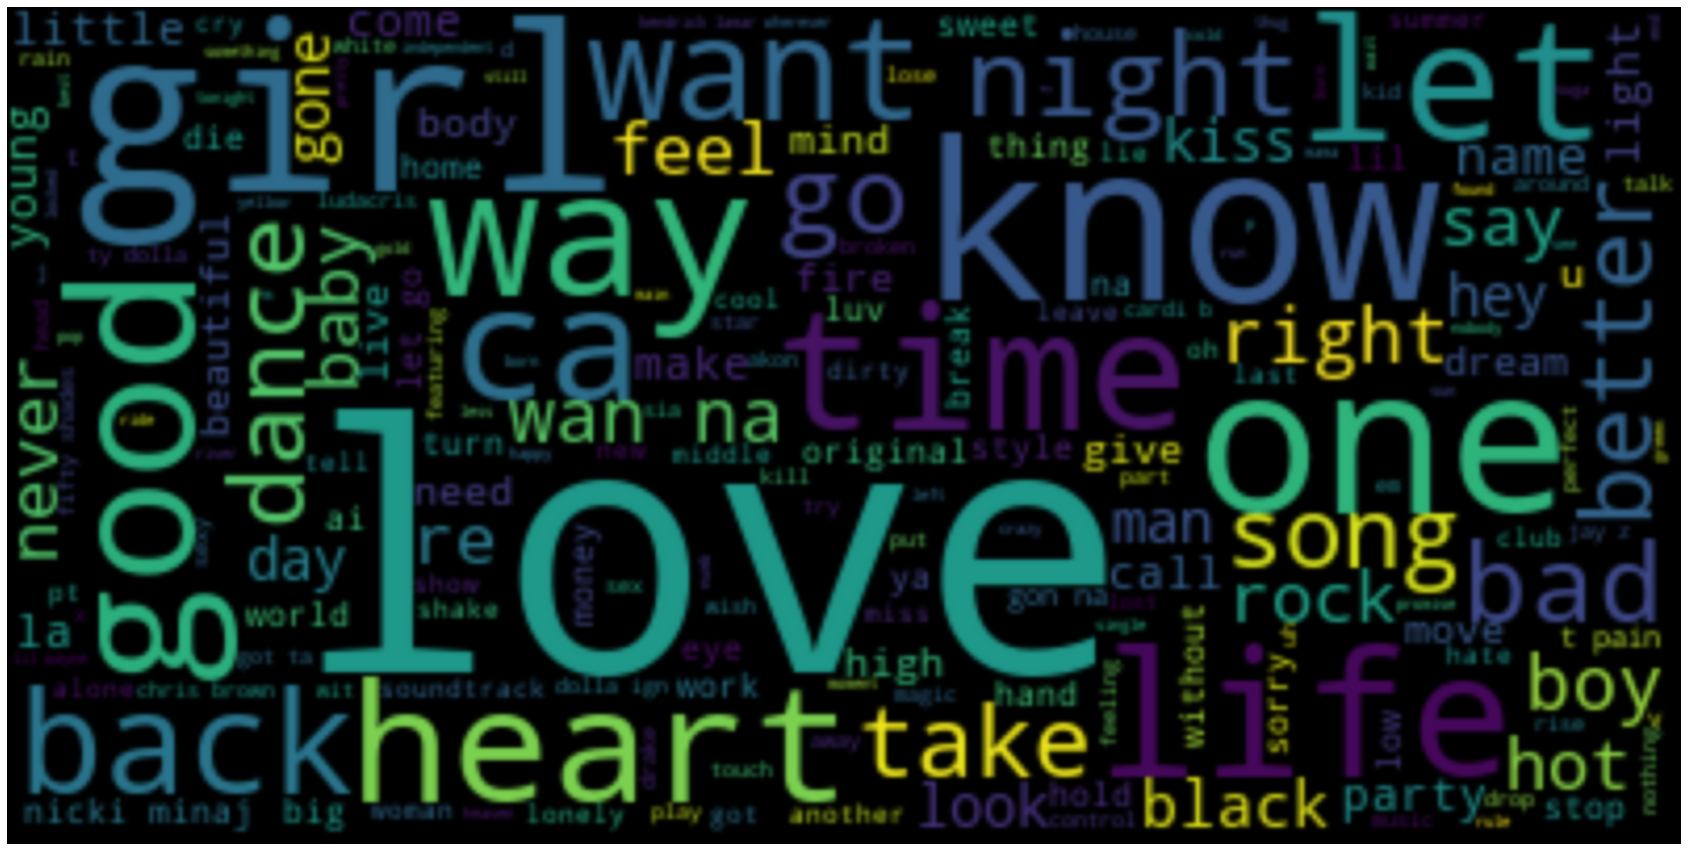

,Word,Count
0,love,97
1,like,49
2,na,27
3,know,27
4,let,25
5,one,24
6,go,23
7,girl,23
8,get,21
9,way,19


In [117]:
# create string of all the words from the list 
token_str = ' '.join(word_list_final)

song_title_wordcloud = WordCloud(background_color='black', margin=2).generate(token_str)
# WordCloud() function to give input and declare parameters

# Display the generated image:

plt.figure(figsize=(30,40))
plt.imshow(song_title_wordcloud, interpolation='gaussian')
plt.axis("off")
plt.margins(x=1, y=1)
plt.show()

# look at word frequency by number

feq_dist = nltk.FreqDist(word_list_final)
feq_dist_df = feq_dist.most_common(10)
songs_word_freq = pd.DataFrame(feq_dist_df,columns = ['Word','Count'])

songs_word_freq.to_csv("songs_word_freq.csv")
songs_word_freq